<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pcl

/Users/winniechen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/winniechen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



補值補0後: Age平均 =  23.87751718869366 Age標準差 =  17.590844644704124

補值補平均後: Age平均 =  29.69911764705882 Age標準差 =  12.883193243702001


/Users/winniechen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/winniechen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



補值由後面往前補後: Age平均 =  29.75509549274255 Age標準差 =  14.347469886198386

補值由前面往後補後: Age平均 =  29.88771996939556 Age標準差 =  14.48476368019123


/Users/winniechen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


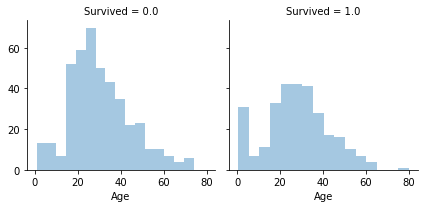

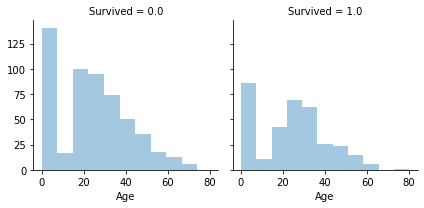

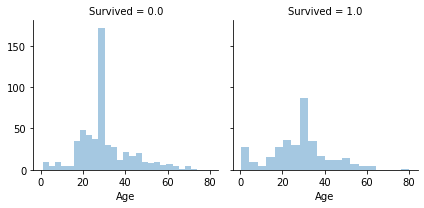

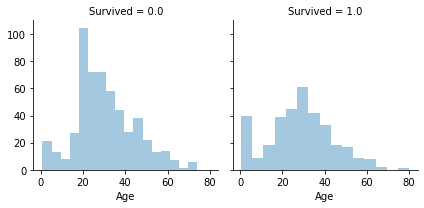

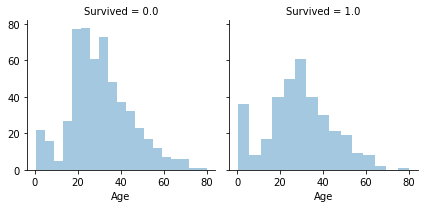

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
%matplotlib inline

#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
#Q1：觀察測試(test) 資料集和訓練(Train) 資料集的變數的差異性？
#Q2：測試資料集是否有遺失值？
#Q3：從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。

df_test = pd.read_csv("Titanic_test.csv")
df_train = pd.read_csv("Titanic_train.csv")
print(df_test.info())
print(df_train.info())
print("\n")
print("Q1 answer: Train data多一筆Survived的欄位,且資料量比Test data還要多出一倍以上")

df_test = df_test.replace('null',np.NaN)   #要先轉換資料類型為‘null’的
print("Q2 answer: Test data miss data is ", df_test.isnull().any(), df_test.isnull().any().sum())
print("\n")

data = df_train.append(df_test)
print("Q3 answer: ",
      "\n補值前: Age平均 = ",data['Age'].mean(), "Age標準差 = ",data['Age'].std()
     )
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
###補0後的平均及標準差
data['Age'] = data['Age'].fillna(0)
print("\n補值補0後: Age平均 = ",data['Age'].mean(), "Age標準差 = ",data['Age'].std()
     )
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
###補平均值後的平均及標準差
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")
data = df_train.append(df_test)
data['Age'] = data['Age'].fillna(data['Age'].mean())
print("\n補值補平均後: Age平均 = ",df_train['Age'].mean(), "Age標準差 = ",data['Age'].std()
     )
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
###往後補前的平均及標準差
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")
data = df_train.append(df_test)
data['Age'] = data['Age'].fillna(method = 'pad')
print("\n補值由後面往前補後: Age平均 = ",data['Age'].mean(), "Age標準差 = ",data['Age'].std()
     )
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
###往前補後的平均及標準差
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")
data = df_train.append(df_test)
data['Age'] = data['Age'].fillna(method = 'bfill')
print("\n補值由前面往後補後: Age平均 = ",data['Age'].mean(), "Age標準差 = ",data['Age'].std()
     )
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

Cabin miss number =  1014


/Users/winniechen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

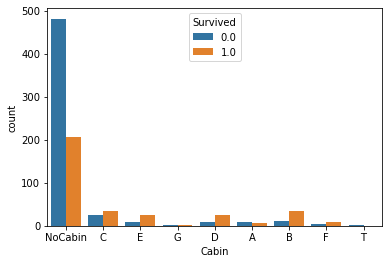

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
%matplotlib inline

#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

data = df_train.append(df_test)
print("Cabin miss number = ",data['Cabin'].isnull().sum())

data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
sns.countplot(data['Cabin'], hue=data['Survived'])
